# Basic tree plot

basic setup

In [1]:
using CairoMakie, BasicTreePlots
using AbstractTrees
update_theme!(Theme(size = (500, 500)))

# plot the tree

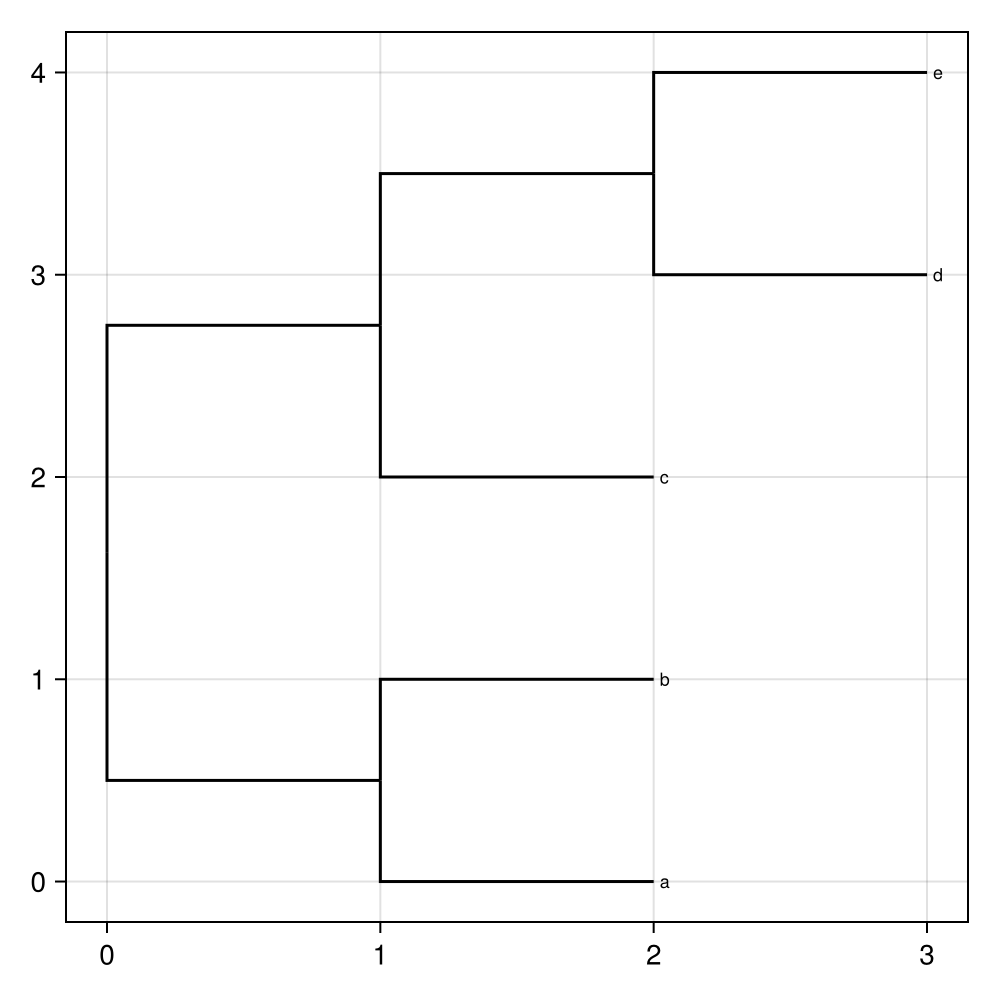

In [2]:
tree = ((:a, :b), (:c, (:d, :e)))
treeplot(tree)

Because most nested collections in julia have `AbstractTrees.children` defined they can be plotted with `treeplot`.

We might want to just look at the tree rather than the axis

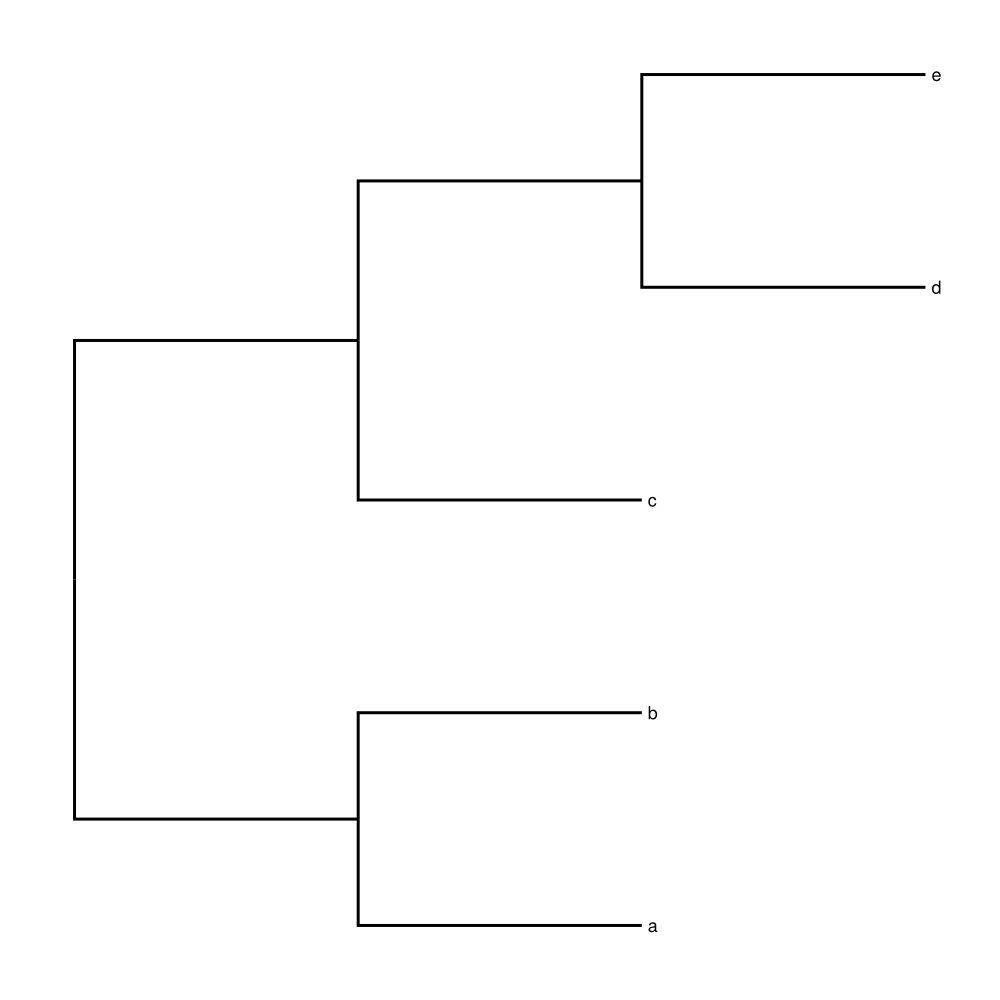

In [3]:
fig = Figure()
ax = Axis(fig[1, 1])
hidedecorations!(ax)
hidespines!(ax)
treeplot!(tree)
fig

Rather than the square branches we can use straight branches

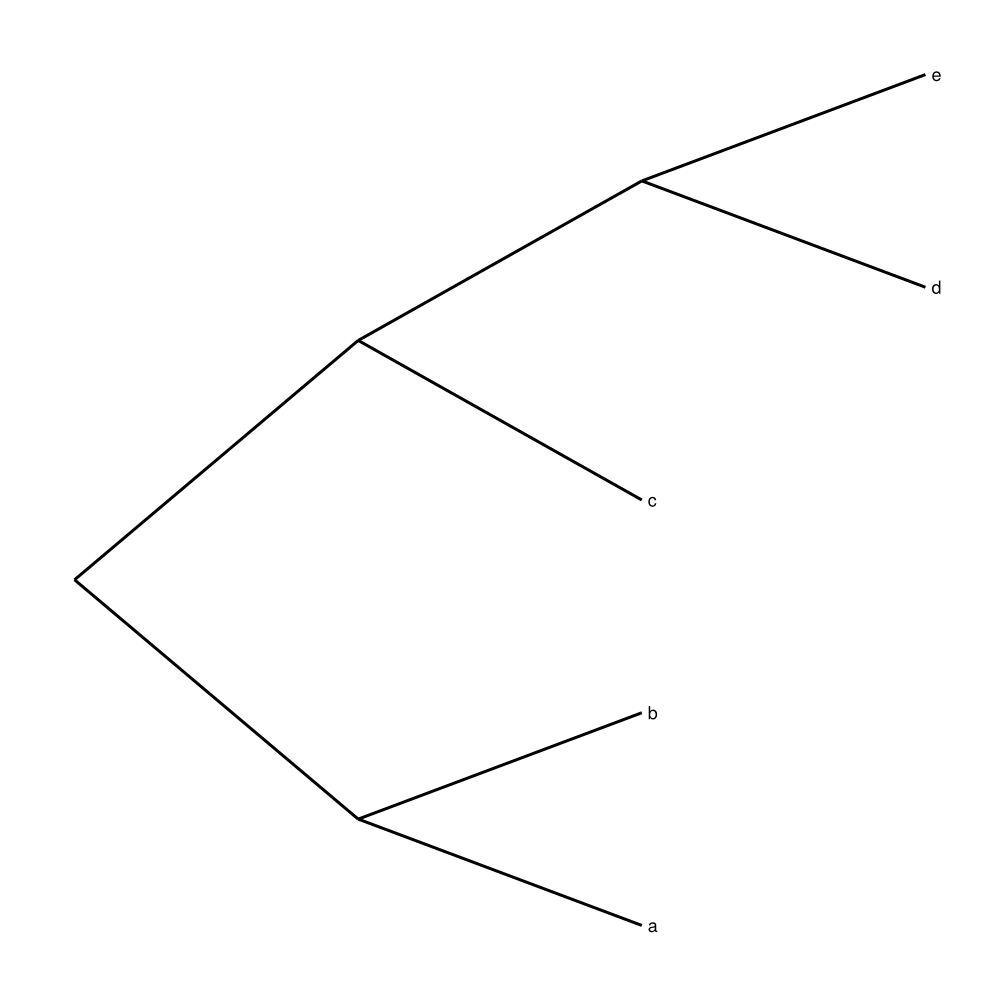

In [4]:
fig = Figure()
ax = Axis(fig[1, 1])
hidedecorations!(ax)
hidespines!(ax)
treeplot!(tree; branchstyle = :straight)
fig

We can plot onto a Polar axis for a circular layout

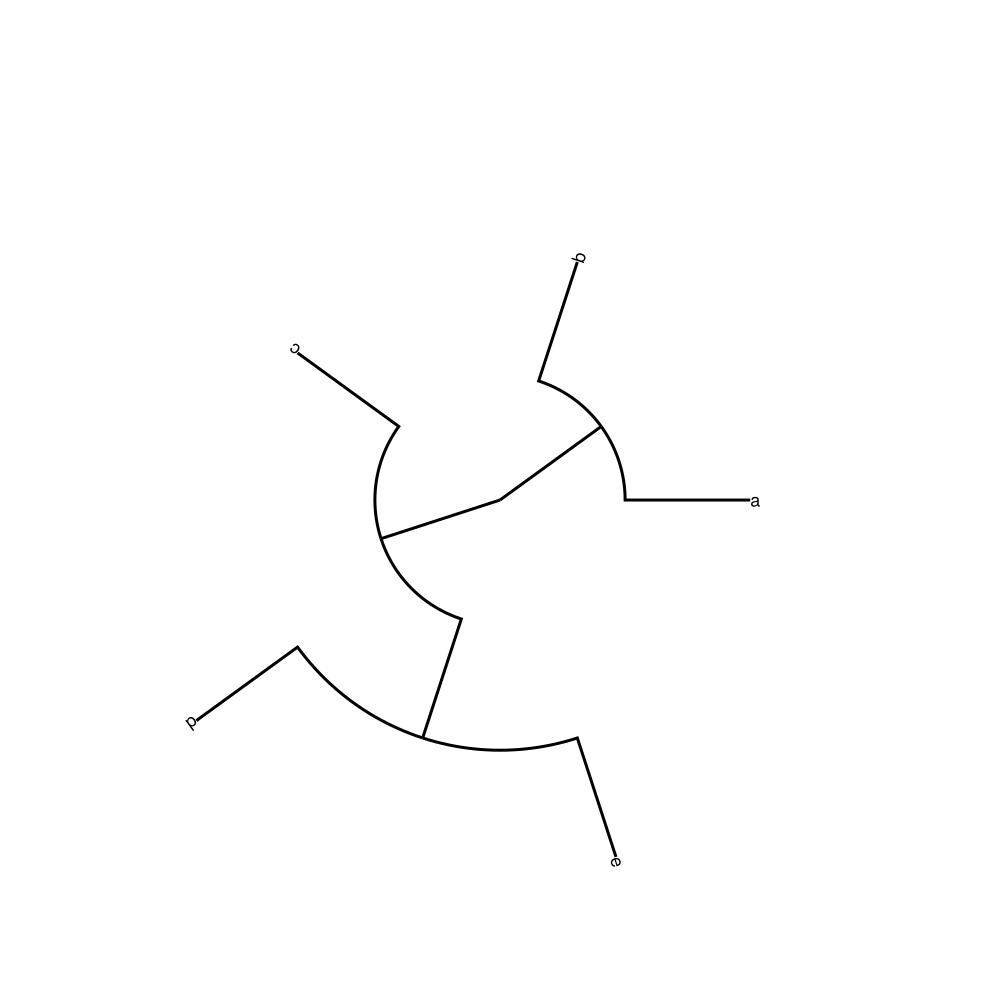

In [5]:
fig = Figure()
ax = PolarAxis(fig[1, 1])
hidedecorations!(ax)
hidespines!(ax)
treeplot!(tree)
fig

We can increase the tip label fontsize.

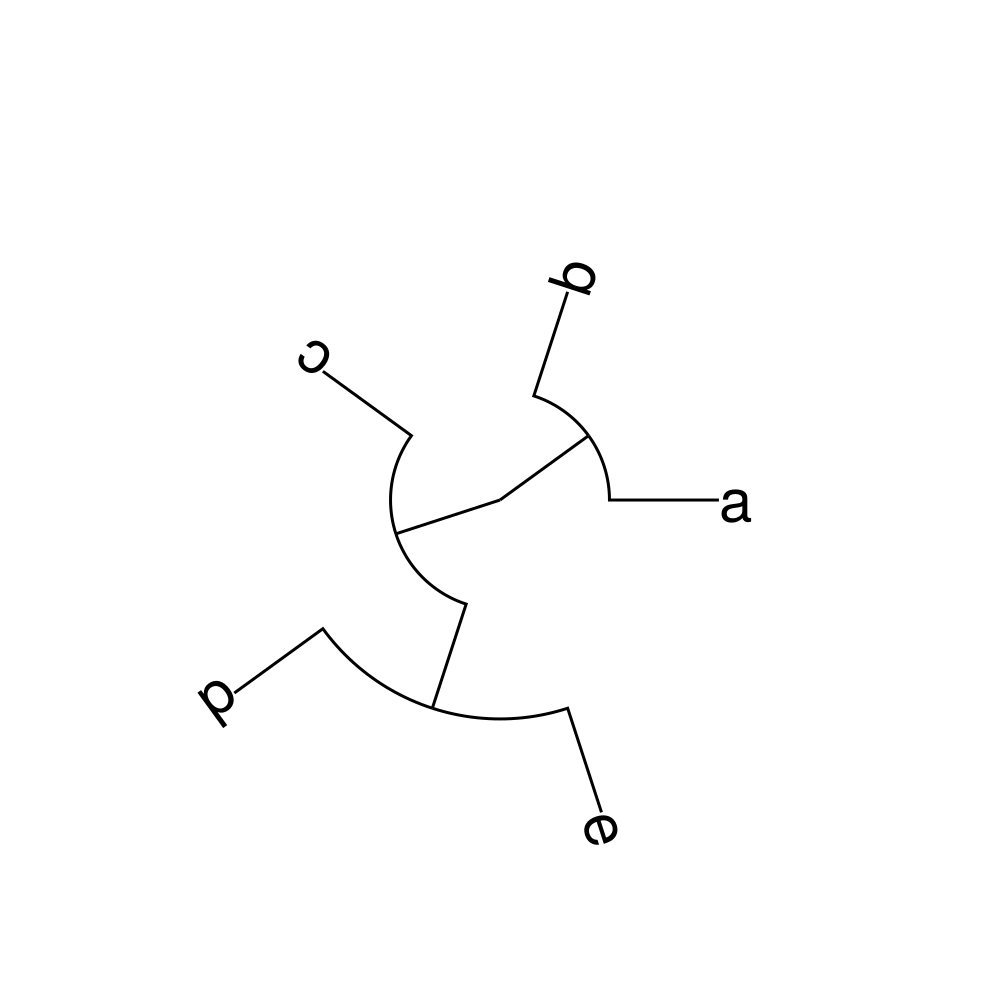

In [6]:
fig = Figure()
ax = PolarAxis(fig[1, 1], rautolimitmargin = (0.0, 0.2))
hidedecorations!(ax)
hidespines!(ax)
treeplot!(tree; tipfontsize = 30)
fig

We can change the line color

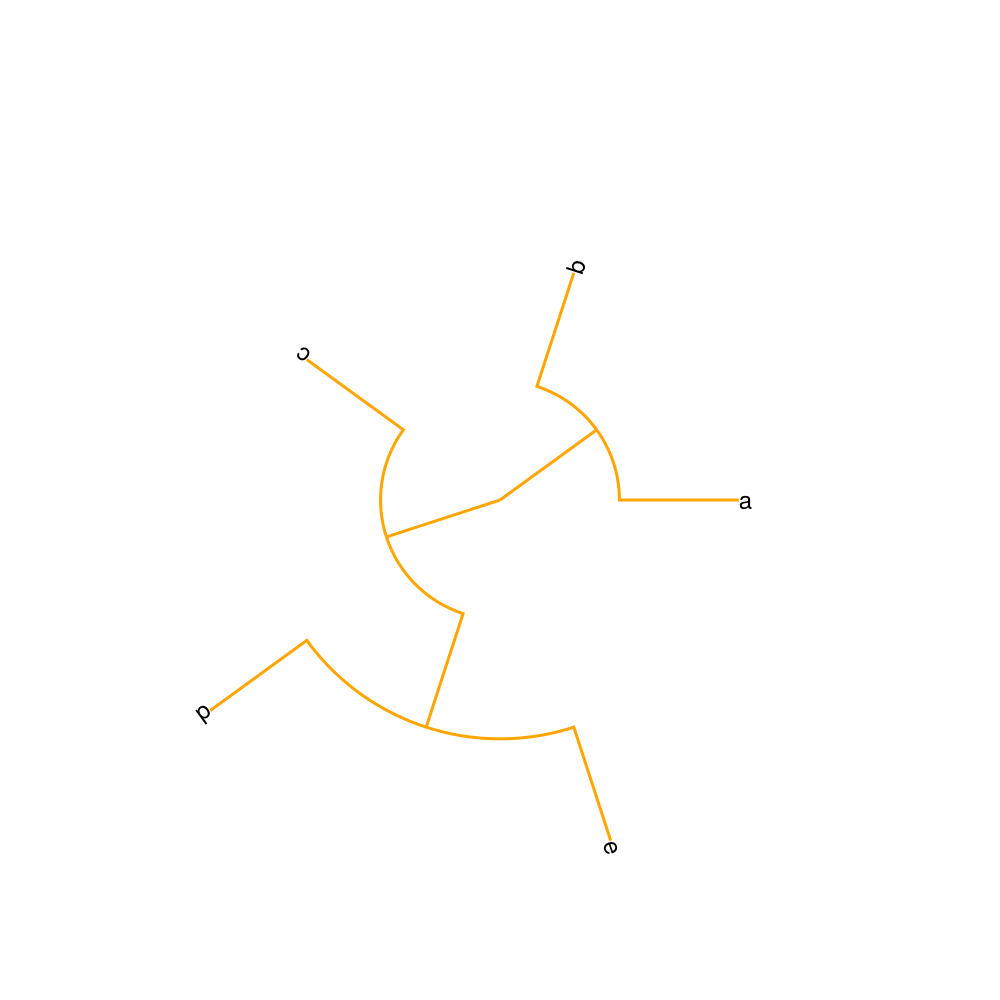

In [7]:
fig = Figure()
ax = PolarAxis(fig[1, 1], rautolimitmargin = (0.0, 0.1))
hidedecorations!(ax)
hidespines!(ax)
treeplot!(tree; linecolor = :orange, tipfontsize = 12)
fig

We can change the line color based on info in the tree

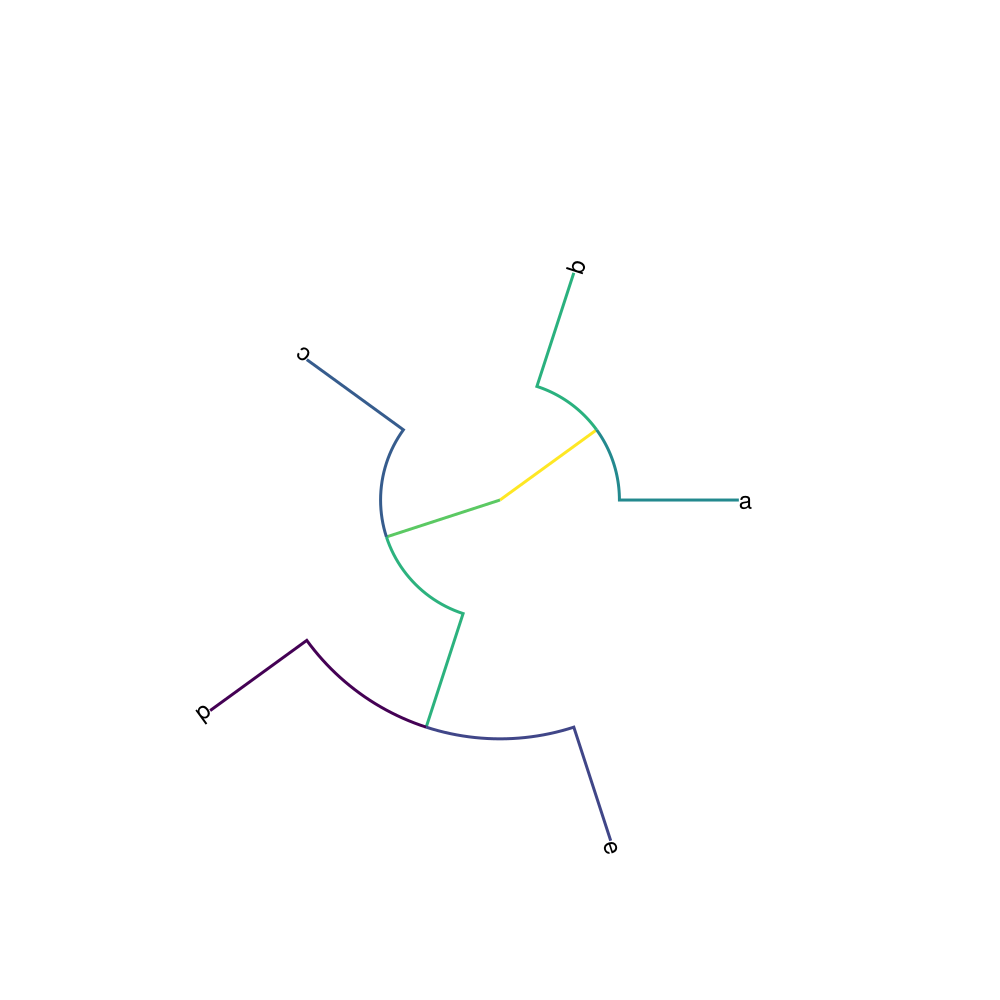

In [8]:
branchcolors = map(PreOrderDFS(tree)) do node
    hash(node)
end

fig = Figure()
ax = PolarAxis(fig[1, 1], rautolimitmargin = (0.0, 0.1))
hidedecorations!(ax)
hidespines!(ax)
treeplot!(tree; linecolor = branchcolors, tipfontsize = 12)
fig

For instance if we have external data about each node in the tree

In [9]:
tree_data = Dict(
    node => (; support = rand(), favorite_number = rand(1:5)) for node in PreOrderDFS(tree)
)

Dict{Any, @NamedTuple{support::Float64, favorite_number::Int64}} with 9 entries:
  :a                         => (support = 0.173683, favorite_number = 1)
  :b                         => (support = 0.111445, favorite_number = 3)
  (:a, :b)                   => (support = 0.11423, favorite_number = 3)
  (:c, (:d, :e))             => (support = 0.0949577, favorite_number = 4)
  :d                         => (support = 0.543842, favorite_number = 1)
  :e                         => (support = 0.50073, favorite_number = 5)
  :c                         => (support = 0.591611, favorite_number = 4)
  (:d, :e)                   => (support = 0.561217, favorite_number = 4)
  ((:a, :b), (:c, (:d, :e))) => (support = 0.643781, favorite_number = 4)

then we can plot support as the color and the favorite number as the line width.

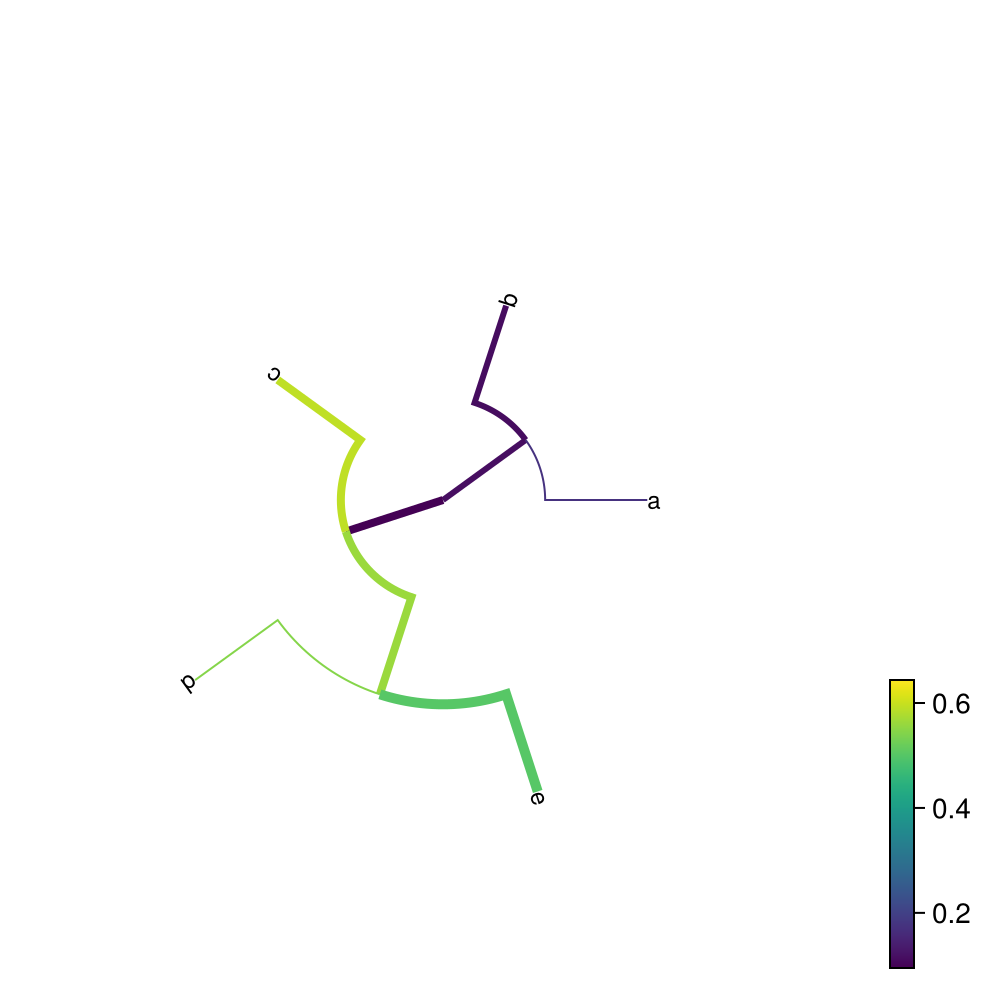

In [10]:
branchcolors = map(PreOrderDFS(tree)) do node
    tree_data[node].support
end

branchwidths = map(PreOrderDFS(tree)) do node
    tree_data[node].favorite_number
end

fig = Figure()
ax = PolarAxis(fig[1, 1], rautolimitmargin = (0.0, 0.1))
hidedecorations!(ax)
hidespines!(ax)
p = treeplot!(tree; linecolor = branchcolors, linewidth = branchwidths, tipfontsize = 12)
Colorbar(fig[1, 2][3, 1], p)
fig

if we have too many leaf tips to read their labels anyway we can turn off the label visibility

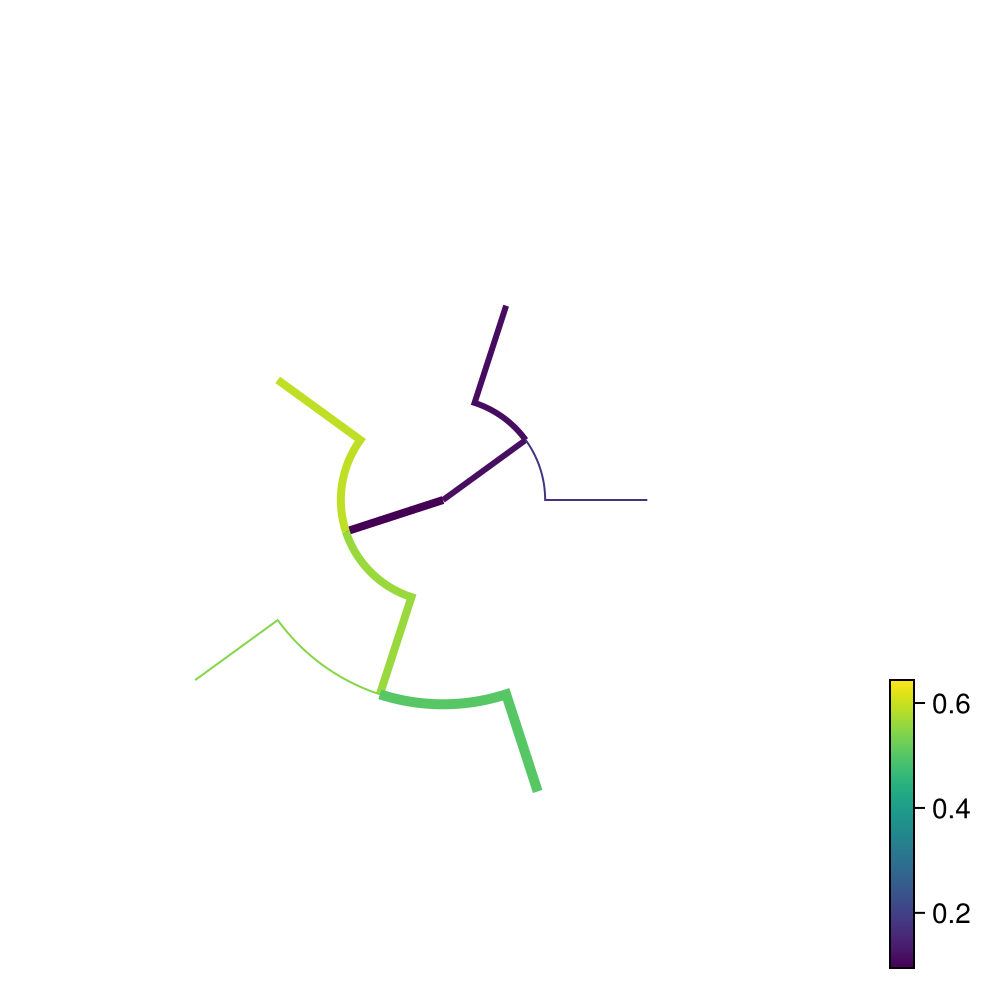

In [11]:
fig = Figure()
ax = PolarAxis(fig[1, 1], rautolimitmargin = (0.0, 0.1))
hidedecorations!(ax)
hidespines!(ax)
p = treeplot!(
    tree;
    linecolor = branchcolors,
    linewidth = branchwidths,
    tipfontsize = 12,
    tipannotationsvisible = false,
)
Colorbar(fig[1, 2][3, 1], p)
fig

For a PolarAxis, We can also control the span across which the tree is plotted. with the `openangle` parameter

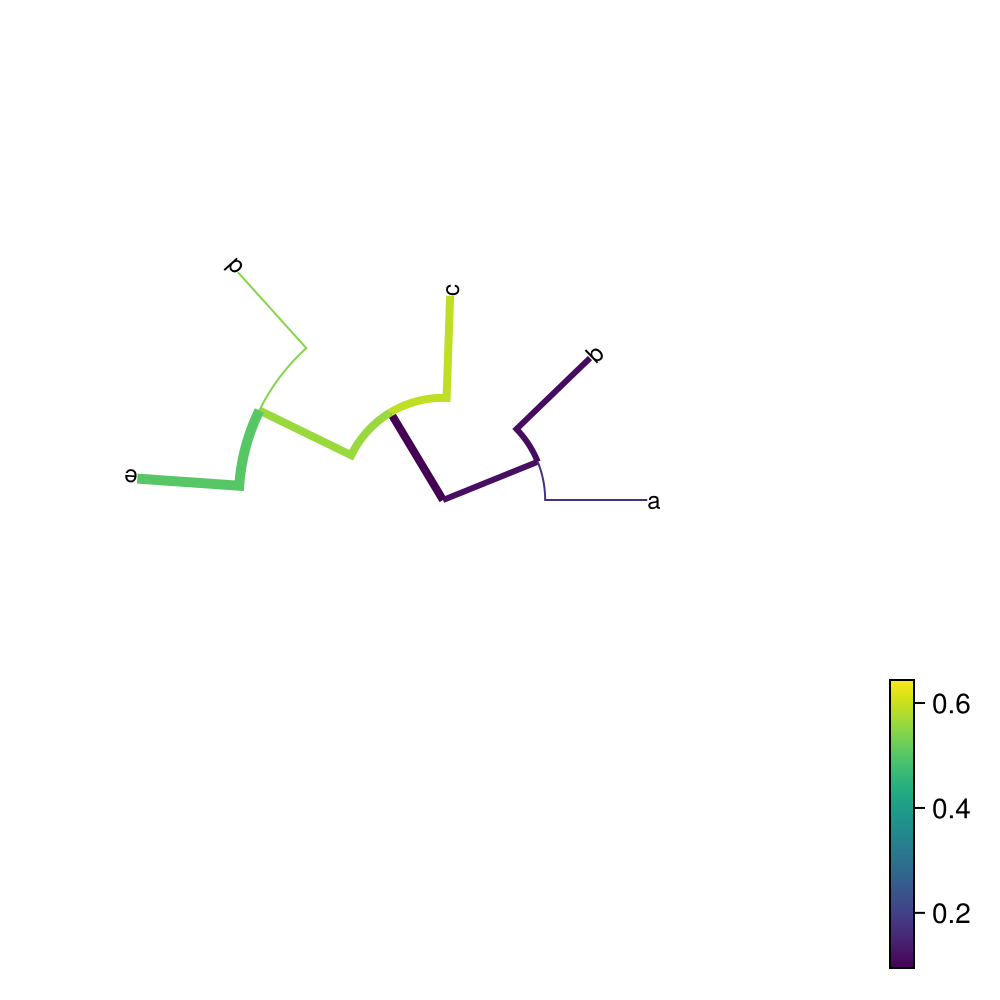

In [12]:
fig = Figure()
ax = PolarAxis(fig[1, 1], rautolimitmargin = (0.0, 0.1))
hidedecorations!(ax)
hidespines!(ax)
p = treeplot!(
    tree;
    linecolor = branchcolors,
    linewidth = branchwidths,
    tipfontsize = 12,
    openangle = deg2rad(140),
)
Colorbar(fig[1, 2][3, 1], p)
fig

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*